<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="900" height="800" /> 


    
### <font color='navy'> Simulación matemática. 

**Nombres:** 
    
+ Sindy Citlali Sánchez Ponce | 721658
+ Darío Castro González | 719910
+ Samuel Rodríguez Partida | 727594


**Fecha:** 26 de octubre del 2022
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Samuelrodriguezp/Proyecto1_RguezSamuel


### <font color='navy'> <font size=30>  PROYECTO

El presente trabajo surge desde la importancia de realizar una aplicación de los temas de ajuste de curvas y programación lineal haciendo uso de datos reales, actuales y de temas cercanos a los estudiantes.
Es por tanto que los **objetivos principales** de este trabajo se enlistan como:

> - Aplicar la teoría sobre ajuste de curvas para formular un polinomio que modele un fenómeno de la vida actual
> - Aplicar la teoría de código sobre programación lineal para resolver un problema formulado por los mismos estudiantes

Dentro de los propósitos principales anteriores existen otros cuya consecución permitirán un efectivo cumplimiento de los dos objetivos principales. **Objetivos secundarios**:

> - Interpretar, importar y normalizar de datos de una fuente confiable que sean base para el ajuste de curvas
> - Formular de un problema de programación lineal con parámetros claros y que permitan una correcta resolución del mismo

### 1.0 Ajuste de curvas

#### Planteamiento

Tomando el sitio web **Data Commons** como fuente de consulta, se encontró un tema atractivo para trabajar: mortalidad infantil. Se encontró una gráfica que comparaba el índice total de mortalidad de México frente al tiempo. Esta era una gráfica que iba en detrimiendo. Se hizo el razonamiento que detrás de esa gráfica había mucho. Esa disminución significaba avances científicos disponibles para las mujeres que darán a luz. Significaba la cobertura en el territorio del sistema nacional de salud que es crucial a la hora de enfermedades en infantes. O también mostraba de manera indirecta la calidad de los servicios y alimentación en todo el país, pensando que una familia con suficiente acceso a agua potable y alimentación balanceada era una familia en donde los infantes tenían menor riesgo de adquirir enfermedades graves, y por tanto, de fallecer.

Así que surgió la pregunta: siguiendo esta tendencia **¿En qué año la mortalidad infantil de México será lo más próximo a el 1%?** 

#### Desarrollo de código

In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sympy as sym

In [4]:
# Importar datos y mostrar datos
archivo = 'infantmortalitymexico (2).csv'
data = pd.read_csv(archivo)
data

,label,Infant Mortality Rate
0,1960,10.71
1,1961,10.31
2,1962,9.94
3,1963,9.59
4,1964,9.27
5,1965,8.97
6,1966,8.68
7,1967,8.41
8,1968,8.14
9,1969,7.88


In [5]:
#Colectar y normalizar datos
x = data.iloc[:,0]
y = data.iloc[:,1]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

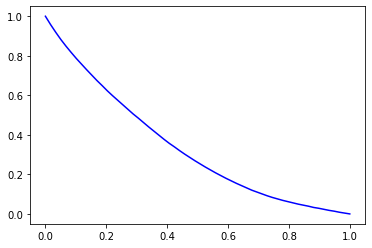

In [6]:
#Mostrar datos
plt.plot(x_norm, y_norm, '-b')

In [9]:
#definir la función objetivo
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [10]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

In [11]:
#Objeter datos y reajustarlos para volver a la escala inicial
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)

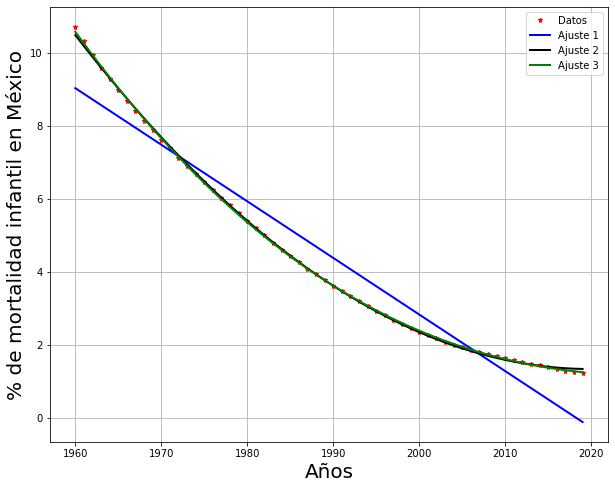

In [12]:
plt.figure(figsize=(10,8))

plt.plot(x, y, 'r*', ms=5, label='Datos')
plt.plot(x, yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot(x, yhat2, 'k', lw=2, label='Ajuste 2')
plt.plot(x, yhat3, 'g', lw=2, label='Ajuste 3')
plt.xlabel('Años',fontsize=20)
plt.ylabel('% de mortalidad infantil en México',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'error')

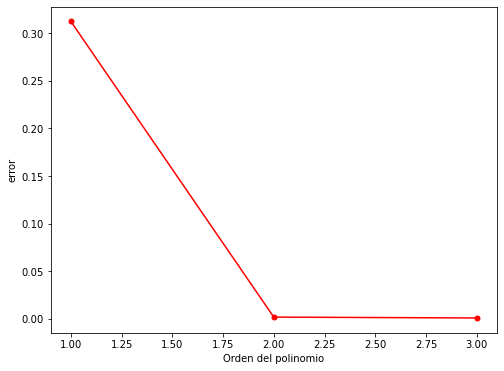

In [13]:
#Método del codo para determinar el mejor ajuste
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ro-', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

Se puede observar que el codo se muestra en el codo 2, por lo que segun este metodo ese sería la aproximación más útil.

### Mostrar pronóstico

In [14]:
#Obtener los beta
beta=ajuste2.x
#Función para ver la grafica
sym.var('z',real=True)
def f_2grado(z):
    return (beta[2]*z**2 + beta[1]*z + beta[0])*(max(y)-min(y)) + min(y)

In [15]:
xnum = np.linspace(0,2,118)
ynum = f_2grado(xnum)
xnum_año = np.linspace(1960,2078,118)

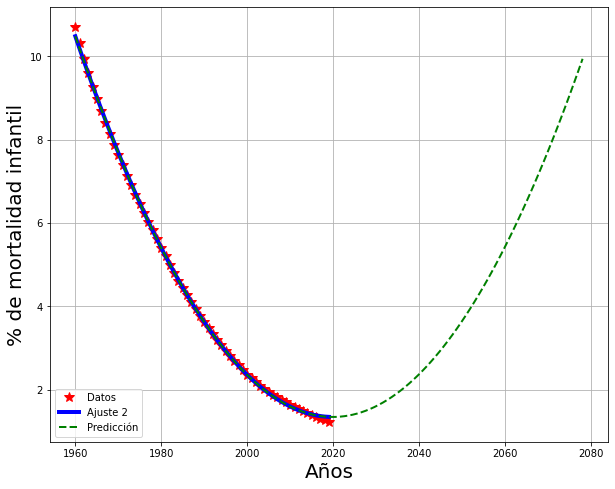

In [16]:
# Graficar
plt.figure(figsize=(10,8))

plt.plot(x, y, 'r*', ms=10, label='Datos')
plt.plot(x, yhat2, 'b', lw=4, label='Ajuste 2')
plt.plot(xnum_año, ynum, 'g--', lw=2, label='Predicción')
plt.xlabel('Años',fontsize=20)
plt.ylabel('% de mortalidad infantil',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

Se puede observar que rapidamente la función cuadrática se eleva por lo que creemos que es necesario utilizar el ajuste 3 para determinar un punto más bajo que se apegue mejor al los datos más recientes.

In [17]:
#Obtener los beta grado 3
beta3g=ajuste3.x
#Función para ver la grafica
sym.var('z',real=True)
def f_3grado(z):
    return (beta3g[3]*z**3 + beta3g[2]*z**2 + beta3g[1]*z + beta3g[0])*(max(y)-min(y)) + min(y)

In [18]:
xnum_3 = np.linspace(0,2,118)
ynum_3 = f_3grado(xnum_3)

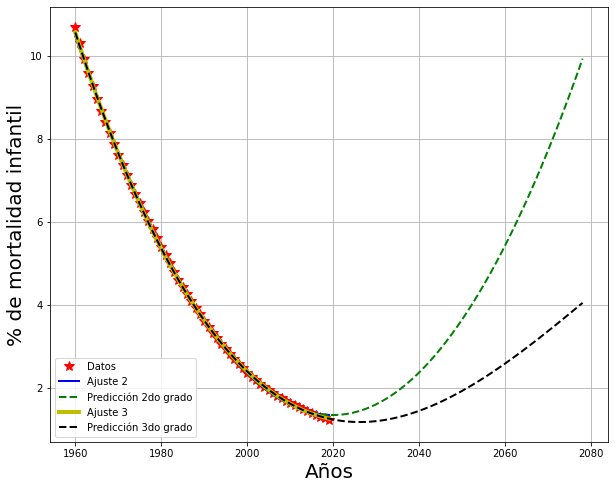

In [19]:
# Graficar
plt.figure(figsize=(10,8))

plt.plot(x, y, 'r*', ms=10, label='Datos')
plt.plot(x, yhat2, 'b', lw=2, label='Ajuste 2')
plt.plot(xnum_año, ynum, 'g--', lw=2, label='Predicción 2do grado')
plt.plot(x, yhat3, 'y', lw=4, label='Ajuste 3')
plt.plot(xnum_año, ynum_3, 'k--', lw=2, label='Predicción 3do grado')
plt.xlabel('Años',fontsize=20)
plt.ylabel('% de mortalidad infantil',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

In [20]:
#Calculamos el x crítico
df3g = sym.diff(f_3grado(z),z)
df3g

-5.62415166779015*z**2 + 23.3567850469904*z - 19.1189585590433

In [21]:
xc=sym.solve(df3g,z)
xc

[1.12132963286373, 3.03161403342395]

In [22]:
f_3grado(xc[0]),f_3grado(xc[1])

(1.17243817449948, 7.70675008287272)

In [23]:
#Buscamos el valor que más se aproxime al primer x crítico
for i in range(118):
    print(i,"-",xnum[i])

0 - 0.0
1 - 0.017094017094017096
2 - 0.03418803418803419
3 - 0.05128205128205129
4 - 0.06837606837606838
5 - 0.08547008547008547
6 - 0.10256410256410257
7 - 0.11965811965811968
8 - 0.13675213675213677
9 - 0.15384615384615385
10 - 0.17094017094017094
11 - 0.18803418803418806
12 - 0.20512820512820515
13 - 0.22222222222222224
14 - 0.23931623931623935
15 - 0.25641025641025644
16 - 0.27350427350427353
17 - 0.2905982905982906
18 - 0.3076923076923077
19 - 0.3247863247863248
20 - 0.3418803418803419
21 - 0.35897435897435903
22 - 0.3760683760683761
23 - 0.3931623931623932
24 - 0.4102564102564103
25 - 0.4273504273504274
26 - 0.4444444444444445
27 - 0.46153846153846156
28 - 0.4786324786324787
29 - 0.4957264957264958
30 - 0.5128205128205129
31 - 0.5299145299145299
32 - 0.5470085470085471
33 - 0.5641025641025642
34 - 0.5811965811965812
35 - 0.5982905982905984
36 - 0.6153846153846154
37 - 0.6324786324786326
38 - 0.6495726495726496
39 - 0.6666666666666667
40 - 0.6837606837606838
41 - 0.700854700854700

In [24]:
xnum_año[66], ynum_3[66]

(2026.5641025641025, 1.1726915063026966)

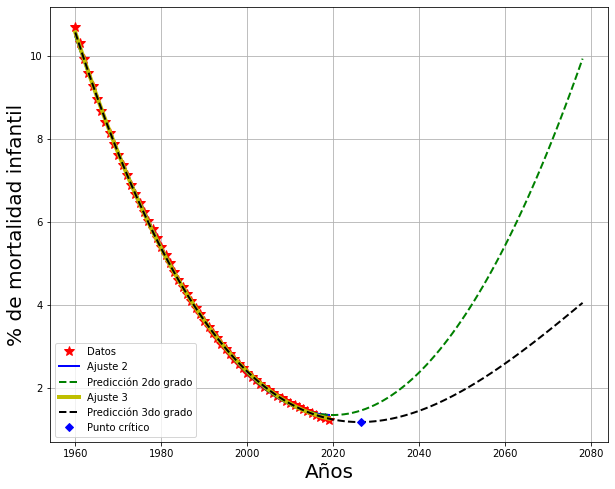

In [25]:
# Graficar
plt.figure(figsize=(10,8))

plt.plot(x, y, 'r*', ms=10, label='Datos')
plt.plot(x, yhat2, 'b', lw=2, label='Ajuste 2')
plt.plot(xnum_año, ynum, 'g--', lw=2, label='Predicción 2do grado')
plt.plot(x, yhat3, 'y', lw=4, label='Ajuste 3')
plt.plot(xnum_año, ynum_3, 'k--', lw=2, label='Predicción 3do grado')
plt.plot(xnum_año[66],ynum_3[66], 'Db',lw=100, label='Punto crítico')
plt.xlabel('Años',fontsize=20)
plt.ylabel('% de mortalidad infantil',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

#### Respuesta al problema planteado

En la gráfica anterior se puede observar el punto más bajo que la curva alcanza, segun nuestro ajuste en el año **2026** la mortalidad infantil alcanzará un indice de **1.17**

### 2.0 Programación lineal

Como se ha mencionado en las clases de Simulación Matemática, la programación lineal tiene múltiples usos que van desde optimizar tiempo y trabajo, hasta recursos. La programación lineal es un campo de la programación matemática que nos permite determinar, bajo ciertas condiciones, el punto máximo o mínimo que cumple las condiciones. En este apartado decidimos proponer el caso real de una empresa que maneja madera cuyos dueños son familiares de uno de los que presenta este proyecto. Con este ejemplo podemos ver que la programación lineal es de gran utilidad tanto para empresas grandes como pequeñas, pues permite evitar el gasto excesivo de recursos o dinero.

#### Planteamiento

En la carpintería de mi mama requieren como minimo para la producción 3000kg de teca, 2000 kg de rosamorada y 2500 kg de parota.

Tenemos tres proveedores y todos nos venden la madera al mismo precio lo único que cambia son los fletes por viaje de cada proveedor. la capacidad de envio en cada flete es la matriz y el costo de cada envio es de 1,100 , 1,050 y 1,025 pesos respectivamente.

Entonce se analizará: **¿Cuántos viajes de cada proveedor habrán que hacerse para que los costos de mi producción sean mínimos?** 

siendo mi proveedor A = $x_1$
proveedor B = $x_2$
y mi proveedor C = $x_3$

También cada flete tendrá un máximo de kilos que pueda cargar por viaje

-|Proveedor A|Proveedor B|Proveedor C
:----|----|----|----
Kilos por viaje de teca|100|120|105
Kilos por viaje de rosamorada|80|60|70
Kilos por viaje de parota|92|80|85


$$ F(c)_(min) = 1,100x_1 + 1,050x_2 + 1,025x_3 $$

$$ 3,000 ≥ 100x_1 + 120x_2 + 105x_3  $$
$$ 2,000 ≥ 80x_1 + 60x_2 + 70x_3 $$
$$ 2,500 ≥ 92x_1 + 80x_2 + 85x_3 $$

#### Desarrollo de código

In [26]:
#importación de librerías necesarias
import scipy.optimize as opt
import numpy as np

# Escribir las matrices como arreglos de Numpy
c = np.array([1100, 1050, 1025])
b = np.array([-3000, -2000, -2500])
A = np.array([[-100, -120, -105],
             [-80, -60, -70],
             [-92, -80, -85]])

In [27]:
c,b,A

(array([1100, 1050, 1025]),
 array([-3000, -2000, -2500]),
 array([[-100, -120, -105],
        [ -80,  -60,  -70],
        [ -92,  -80,  -85]]))

In [28]:
sol_farma = opt.linprog(c,A,b)

In [29]:
sol_farma

     con: array([], dtype=float64)
     fun: 30086.205562114297
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-1.32610021e-04,  8.62068037e+01, -1.11073060e-04])
  status: 0
 success: True
       x: array([6.46551694e+00, 2.54925049e-08, 2.24137921e+01])

#### Respuesta al problema planteado

Así que se deberán hacer 6 viajes para obtener la madera del proveedor A, 2 viajes del proveedor B y 2 viajes del proveedor C

## Fuentes de Consulta

DataCommons (26.09.2022). https://datacommons.org/place/country/MEX?utm_medium=explore&mprop=count&popt=Person&cpv=isInternetUser%2CTrue&hl=es